#Data

In [1]:
!pip install yahooquery
from yahooquery import Screener, Ticker
import pandas as pd
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def get_data(ticker_names, days=1000):
    """
    ticker_names: list
    # output
    table: pd.DataFrame
    """
    yh_conn = Ticker(ticker_names)
    res = yh_conn.history(period=f"{days}D", interval='1d')
    table = None
    for crypto in res.index.get_level_values(0).unique().tolist():
        temp = res.loc[crypto, ]
        temp.columns = [crypto.split("-")[0] + "-" + x for x in temp.columns.tolist()]
        if table is None:
            table = temp
        else:
            table = pd.merge(table, temp, how='outer', left_index=True, right_index=True)
    table.reset_index(inplace=True)
    table['date'] = pd.to_datetime(table['date'])
    return table

In [4]:
get_data(['MOM', 'MTUM', 'SPY'])

,date,MOM-close,MOM-low,MOM-open,MOM-high,MOM-volume,MOM-adjclose,MOM-dividends,MTUM-close,MTUM-low,...,MTUM-volume,MTUM-adjclose,MTUM-dividends,SPY-close,SPY-low,SPY-open,SPY-high,SPY-volume,SPY-adjclose,SPY-dividends
0,2019-01-08,23.990000,23.979300,23.979300,23.990000,300.0,23.990000,0.0,102.260002,100.889999,...,1273600.0,97.240494,0.0,256.769989,254.000000,256.820007,257.309998,102512600.0,240.227066,0.0
1,2019-01-09,25.139999,24.040001,24.170000,25.139999,1108.0,25.139999,0.0,102.860001,102.349998,...,1356900.0,97.811050,0.0,257.970001,256.190002,257.559998,258.910004,95006600.0,241.349716,0.0
2,2019-01-10,23.799999,23.799999,23.855900,23.855900,404.0,23.799999,0.0,103.000000,101.599998,...,1530500.0,97.944168,0.0,258.880005,255.500000,256.260010,259.160004,96823900.0,242.201126,0.0
3,2019-01-11,23.715000,23.715000,23.715000,23.715000,94.0,23.715000,0.0,103.070000,102.389999,...,1032600.0,98.010735,0.0,258.980011,257.029999,257.679993,259.010010,73858100.0,242.294647,0.0
4,2019-01-14,23.635000,23.129999,23.129999,23.799999,240.0,23.635000,0.0,102.169998,102.040001,...,972800.0,97.154930,0.0,257.399994,256.410004,256.859985,258.299988,70908200.0,240.816452,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.029999,143.339996,...,372700.0,144.029999,0.0,380.019989,378.279999,383.470001,383.820007,79878100.0,380.019989,0.0
996,2022-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.589996,143.789993,...,399400.0,144.589996,0.0,380.540009,377.850006,379.230011,382.230011,74427200.0,380.540009,0.0
997,2022-12-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.660004,145.000000,...,375300.0,146.660004,0.0,386.230011,382.690002,383.250000,387.410004,78167400.0,386.230011,0.0
998,2022-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.050003,143.330002,...,366200.0,145.050003,0.0,380.720001,374.769989,383.049988,386.209991,100120900.0,380.720001,0.0


In [5]:
yh_conn = Ticker(["VIX"])
res = yh_conn.history(period="4000D", interval='1d')
res.loc['VIX', ]

,low,volume,high,open,close,adjclose
date,,,,,,
2014-12-04,27953.000000,811330.0,30096.900391,28200.400391,28447.699219,28447.699219
2014-12-05,25974.000000,377529.0,27540.699219,26551.199219,26056.500000,26056.500000
2014-12-08,23582.800781,367585.0,26056.500000,25231.900391,23582.800781,23582.800781
2014-12-09,21274.000000,570963.0,23582.800781,23582.800781,21274.000000,21274.000000
2014-12-10,19212.500000,539795.0,20202.000000,19789.699219,19295.000000,19295.000000
...,...,...,...,...,...,...
2018-01-22,9600.000000,257523.0,10000.000000,9900.000000,9800.000000,9800.000000
2018-01-23,9700.000000,184915.0,9900.000000,9900.000000,9900.000000,9900.000000
2018-01-26,8400.000000,277990.0,9500.000000,9300.000000,9300.000000,9300.000000


In [6]:
data_volume = get_data(['MTUM'], days=4000)
data_volume = data_volume.iloc[201:1779].reset_index()
data_volume = data_volume.drop(columns=['index'])
data_volume

<ipython-input-3-2fcc126fe49f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['date'] = pd.to_datetime(table['date'])


,date,MTUM-low,MTUM-close,MTUM-open,MTUM-volume,MTUM-high,MTUM-adjclose,MTUM-dividends
0,2014-02-04,57.160000,57.680000,57.410000,16500,57.810001,51.677872,0.0
1,2014-02-05,56.730000,57.500000,57.549999,19700,57.709999,51.516602,0.0
2,2014-02-06,57.630001,58.169998,57.630001,4000,58.180000,52.116879,0.0
3,2014-02-07,58.599998,59.410000,58.599998,4100,59.410000,53.227856,0.0
4,2014-02-10,59.419998,59.490002,59.619999,9700,59.619999,53.299530,0.0
...,...,...,...,...,...,...,...,...
1573,2020-05-05,118.510002,119.449997,118.680000,749700,120.620003,115.898552,0.0
1574,2020-05-06,119.320000,119.419998,120.309998,544100,120.739998,115.869453,0.0
1575,2020-05-07,119.919998,120.279999,120.580002,2927000,121.099998,116.703880,0.0
1576,2020-05-08,120.839996,121.650002,121.459999,984200,121.870003,118.033157,0.0


In [7]:
data_volume.to_csv('/content/drive/MyDrive/7811 Final Project/MTUM_Volume.csv', index=False)

In [8]:
data = get_data(['MOM', 'MTUM', 'SPY'], days=4000)[['date', 'MOM-adjclose', 'MTUM-adjclose', 'SPY-adjclose']]

In [9]:
data.dropna(inplace=True)
data.to_csv('/content/drive/MyDrive/7811 Final Project/MOM_MTUM_SPY.csv', index=False)

In [10]:
data

,date,MOM-adjclose,MTUM-adjclose,SPY-adjclose
1559,2013-04-18,24.485399,45.117115,128.588196
1560,2013-04-19,24.379999,45.117115,129.706116
1561,2013-04-22,24.777500,45.117115,130.281708
1562,2013-04-23,24.999901,46.268970,131.624832
1563,2013-04-24,24.747801,45.684177,131.708282
...,...,...,...,...
3555,2021-03-23,21.536600,156.233124,379.478821
3556,2021-03-24,21.536600,152.366119,377.549774
3557,2021-03-25,21.536600,152.074951,379.673737
3558,2021-03-26,21.536600,154.781479,385.792145


# Question 2: Compare price series of DJTMNMO and MOM for the overlapping interval

In [11]:
import yfinance as yf
MOM = yf.download(tickers = ['MOM'])
MOM

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-09-07,25.160000,25.660000,24.950001,25.100000,25.100000,13400
2011-09-08,25.350000,25.350000,25.090000,25.090000,25.090000,7200
2011-09-09,24.940001,25.020000,24.780001,24.840000,24.840000,5830
2011-09-12,24.950001,24.950001,24.850000,24.850000,24.850000,16800
2011-09-13,25.150000,25.150000,24.940001,25.059999,25.059999,8300
...,...,...,...,...,...,...
2021-03-23,21.536600,21.536600,21.536600,21.536600,21.536600,0
2021-03-24,21.536600,21.536600,21.536600,21.536600,21.536600,0
2021-03-25,21.536600,21.536600,21.536600,21.536600,21.536600,0


In [12]:
DJTMNMO = pd.read_excel('/content/drive/MyDrive/7811 Final Project/MomentumDJTMNMO.xlsx',
                       skiprows = 6, usecols= 'A:B').iloc[:-1, :]
DJTMNMO['Effective date '] = pd.to_datetime(DJTMNMO['Effective date '])
DJTMNMO.rename(columns={
    'Effective date ': 'date',
    'Dow Jones U.S. Thematic Market Neutral Momentum Total Return Index': 'DJTMNMO-TR-adjclose',
}, inplace=True)
DJTMNMO.dropna(inplace=True)
DJTMNMO.set_index('date', inplace=True)
DJTMNMO

,DJTMNMO-TR-adjclose
date,
2010-04-30,957.32
2010-05-01,957.32
2010-05-02,957.32
2010-05-03,972.82
2010-05-04,959.97
...,...
2020-05-05,1363.20
2020-05-06,1372.54
2020-05-07,1373.43


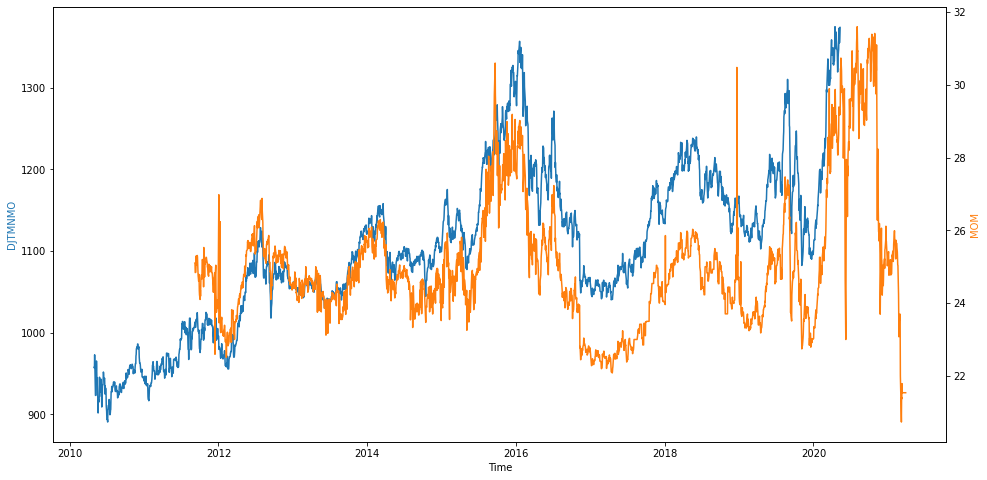

In [13]:
fig,ax = plt.subplots(figsize = (16,8))
# make a plot
ax.plot(DJTMNMO[['DJTMNMO-TR-adjclose']],color = 'tab:blue')
# set x-axis label
ax.set_xlabel("Time")
# set y-axis label
ax.set_ylabel("DJTMNMO",color = 'tab:blue')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(MOM[['Adj Close']], color = 'tab:orange')
ax2.set_ylabel("MOM", color = 'tab:orange')
plt.show()